## Библиотеки

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_openml # набор данных о спаме из sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

# Задание 1 

Постройте алгоритм метода опорных векторов типа "C-classification" с параметром C = 1, используя ядро "linear". Визуализируйте разбиение пространства признаков на области с помощью полученной модели. Выведите количество полученных опорных векторов, а также ошибки классификации на обучающей и тестовой выборках.

In [2]:
train_data = pd.read_csv("svmdata1.txt", delimiter="\t")
test_data = pd.read_csv("svmdata1test.txt", delimiter="\t")

X_train = train_data[["X1", "X2"]]
y_train = train_data["Color"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Color"]

y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

In [3]:
model = svm.SVC(C=1, kernel='linear')
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [4]:
num_support_vectors = len(model.support_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки классификации
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

print("Количество опорных векторов:", num_support_vectors)
print("Ошибка классификации на обучающей выборке:", train_error)
print("Ошибка классификации на тестовой выборке:", test_error)


Количество опорных векторов: 6
Ошибка классификации на обучающей выборке: 0.0
Ошибка классификации на тестовой выборке: 0.0


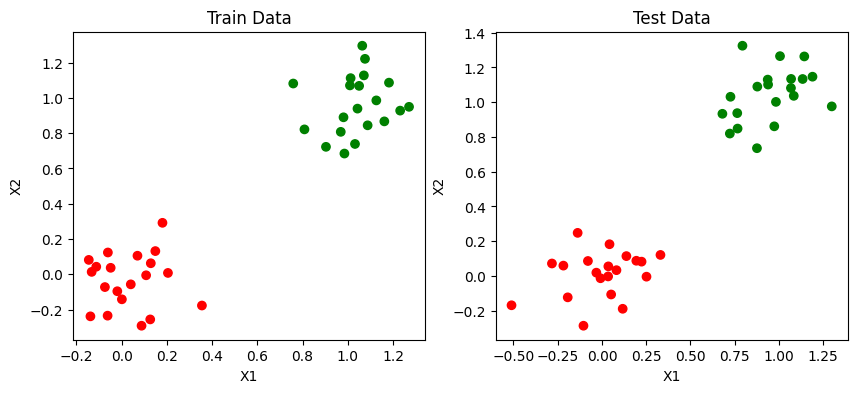

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 0, 'red', 'green')
axs[0].scatter(train_data["X1"], train_data["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 0, 'red', 'green')
axs[1].scatter(test_data["X1"], test_data["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

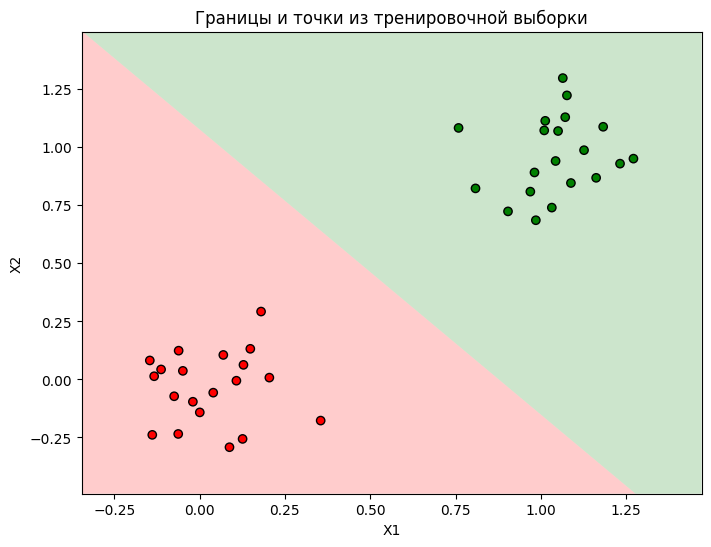

In [6]:
custom_cmap = ListedColormap(['r', 'g'])
colors = np.where(y_train == 0, 'red', 'green')
# Cетку для визуализации
def grid(X):
    x_min, x_max = X["X1"].min() - 0.2, X["X1"].max() + 0.2
    y_min, y_max = X["X2"].min() - 0.2, X["X2"].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z
    

xx_train, yy_train, Z_train = grid(X_train)    

plt.figure(figsize=(8, 6))
plt.contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
plt.scatter(X_train["X1"], X_train["X2"], c=colors, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Границы и точки из тренировочной выборки')
plt.show()


# Задание 2 

Используя алгоритм метода опорных векторов типа "C-classification" с линейным ядром, добейтесь нулевой ошибки сначала на обучающей выборке, а затем на тестовой, путем изменения параметра C. Выберите оптимальное значение данного параметра и объясните свой выбор. Всегда ли нужно добиваться минимизации ошибки на обучающей выборке?

In [7]:
train_data = pd.read_csv("svmdata2.txt", delimiter="\t")
test_data = pd.read_csv("svmdata2test.txt", delimiter="\t")

X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]

y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

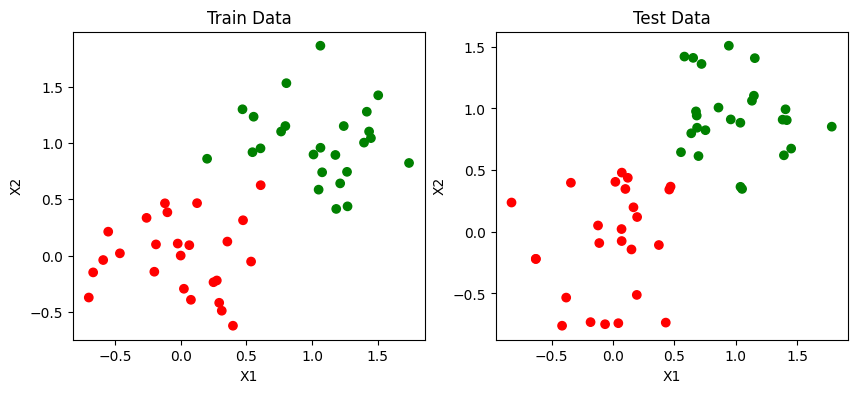

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 0, 'red', 'green')
axs[0].scatter(train_data["X1"], train_data["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 0, 'red', 'green')
axs[1].scatter(test_data["X1"], test_data["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

### Нулевая ошибка на обучающей выборке

In [9]:
С_val=500

model = svm.SVC(C=С_val, kernel='linear')# C>=483 - для тренировочной, чтобы достигнуть нулевой ошибки
model.fit(X_train, y_train)

SVC(C=500, kernel='linear')

In [10]:
num_support_vectors = len(model.support_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки классификации
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

print("Для С =", С_val)
print("Количество опорных векторов:", num_support_vectors)
print("Ошибка классификации на обучающей выборке:", train_error)
print("Ошибка классификации на тестовой выборке:", test_error)

Для С = 500
Количество опорных векторов: 3
Ошибка классификации на обучающей выборке: 0.0
Ошибка классификации на тестовой выборке: 0.06000000000000005


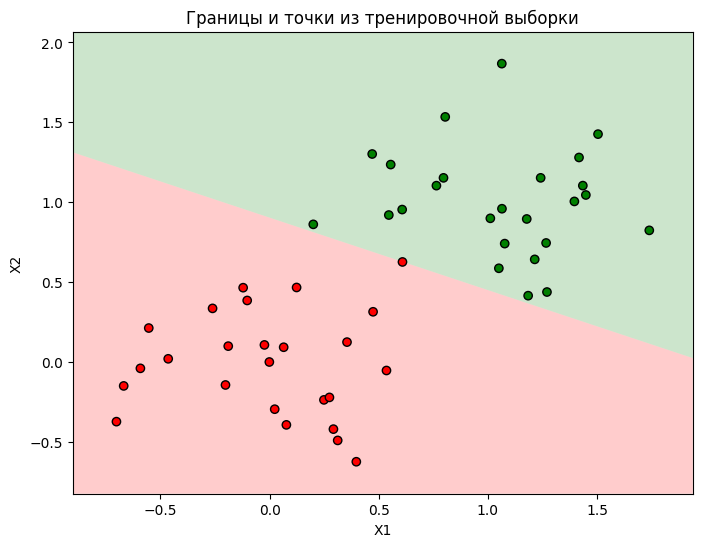

In [11]:
custom_cmap = ListedColormap(['r', 'g'])
colors = np.where(y_train == 0, 'red', 'green')

# Cетка для визуализации
def grid(X):
    x_min, x_max = X["X1"].min() - 0.2, X["X1"].max() + 0.2
    y_min, y_max = X["X2"].min() - 0.2, X["X2"].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z
    

xx_train, yy_train, Z_train = grid(X_train)    

plt.figure(figsize=(8, 6))
plt.contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
plt.scatter(X_train["X1"], X_train["X2"], c=colors, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Границы и точки из тренировочной выборки')
plt.show()


### Нулевая ошибка на тестовой выборке

In [12]:
С_val=100

model = svm.SVC(C=С_val, kernel='linear')# C=1 - достаточно для тестовой, чтобы получить нулевую ошибку
model.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [13]:
num_support_vectors = len(model.support_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ошибки классификации
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

print("Для С =", С_val)
print("Количество опорных векторов:", num_support_vectors)
print("Ошибка классификации на обучающей выборке:", train_error)
print("Ошибка классификации на тестовой выборке:", test_error)

Для С = 100
Количество опорных векторов: 4
Ошибка классификации на обучающей выборке: 0.020000000000000018
Ошибка классификации на тестовой выборке: 0.0


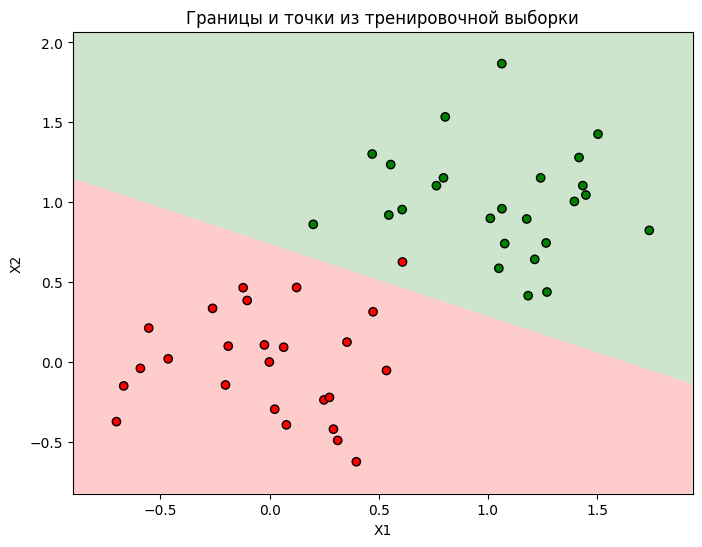

In [14]:
custom_cmap = ListedColormap(['r', 'g'])
colors = np.where(y_train == 0, 'red', 'green')

# Cетка для визуализации
def grid(X):
    x_min, x_max = X["X1"].min() - 0.2, X["X1"].max() + 0.2
    y_min, y_max = X["X2"].min() - 0.2, X["X2"].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z
    

xx_train, yy_train, Z_train = grid(X_train)    

plt.figure(figsize=(8, 6))
plt.contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
plt.scatter(X_train["X1"], X_train["X2"], c=colors, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Границы и точки из тренировочной выборки')
plt.show()


### Выводы

Параметр C в методе опорных векторов контролирует баланс между достижением "гладкой" гиперплоскости (при больших значениях C) и правильной классификацией обучающих точек (при малых значениях C). Увеличение C делает модель более сложной и позволяет ей более точно подстроиться под обучающие данные, что может привести к переобучению.

Исходя из полученных результатов:

1. **Для C = 500:**
   - Количество опорных векторов: 3
   - Ошибка на обучающей выборке: 0.0 (модель абсолютно точно предсказывает обучающие данные, что может быть признаком переобучения)
   - Ошибка на тестовой выборке: 0.06000000000000005 (небольшая ошибка на тестовой выборке, но может являться признаком переобучения)

2. **Для C = 100:**
   - Количество опорных векторов: 4 
   - Ошибка на обучающей выборке: 0.020000000000000018 (модель хорошо предсказывает обучающие данные)
   - Ошибка на тестовой выборке: 0.0 (нулевая ошибка на тестовой выборке - хороший показатель, но возможно, есть потенциал для повышения сложности модели)

Нужно стремиться к минимизации ошибки на тестовой выборке, так как это позволяет модели хорошо обобщать на новых, ранее не известных данных. Но также важно не забывать о переобучении - модель должна быть способна обобщать, а не просто запоминать обучающие данные.

На основе результатов, значение C = 100 кажется мне более предпочтительным, так как оно дает нулевую ошибку на тестовой выборке. Также визуально на графиках видно, что для C = 100 зазор больше, чем для C = 500, что является более хорошим вариантом для классификации новых данных. 

# Задание 3

Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества ошибок на тестовой выборке. Попробуйте различные значения параметра degree для полиномиального ядра.

In [15]:
data = pd.read_csv("svmdata3.txt", delimiter="\t")

X = data[["X1", "X2"]]
y = data["Colors"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)

y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

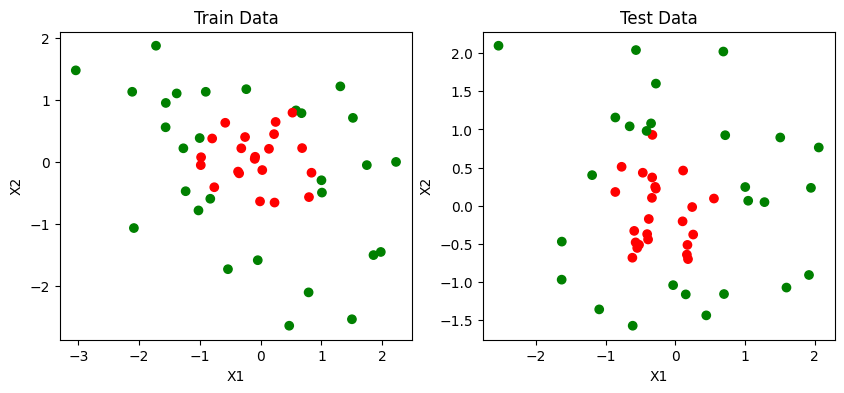

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 0, 'red', 'green')
axs[0].scatter(X_train["X1"], X_train["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 0, 'red', 'green')
axs[1].scatter(X_test["X1"], X_test["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

kernel - poly
Количество ошибок на тестовой выборке: 3



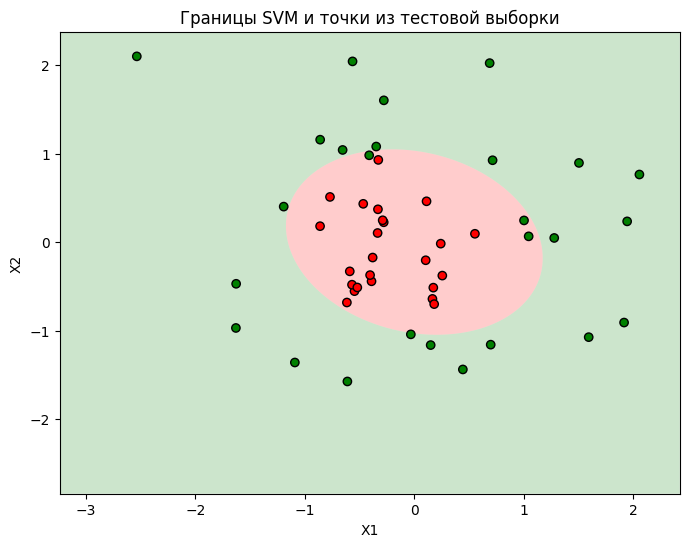

kernel - rbf
Количество ошибок на тестовой выборке: 1



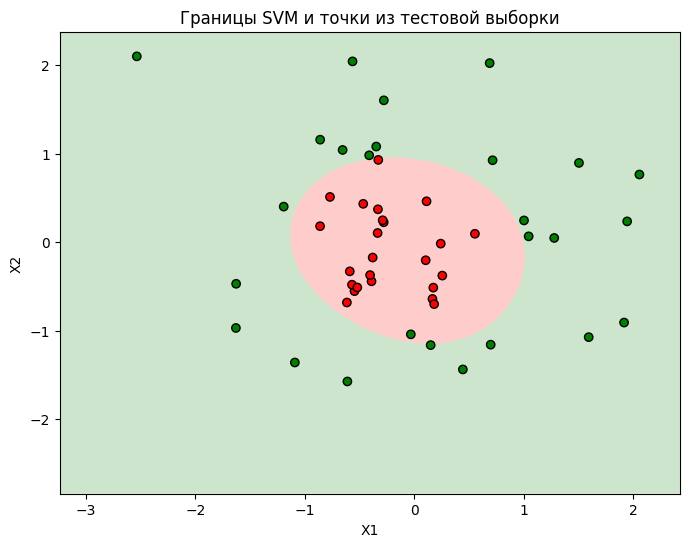

kernel - sigmoid
Количество ошибок на тестовой выборке: 29



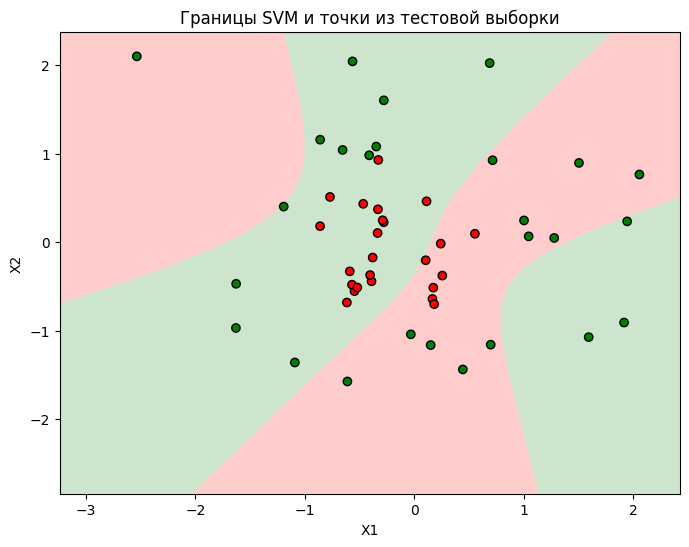

In [18]:
kernels = ['poly', 'rbf', 'sigmoid']

# Cетка для визуализации
def grid(X):
    x_min, x_max = X["X1"].min() - 0.2, X["X1"].max() + 0.2
    y_min, y_max = X["X2"].min() - 0.2, X["X2"].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

for kernel in kernels:
    print("kernel -", kernel)
    
    model = svm.SVC(C=5, kernel=kernel, degree=2)
    model.fit(X_train, y_train)

#     y_train_pred = model.predict(X_train)
#     errors_on_train_set = len(y_train) - accuracy_score(y_train, y_train_pred, normalize=False)
#     train_error = 1 - accuracy_score(y_train, y_train_pred)
#     print("Количество ошибок на треноровочной выборке:", errors_on_train_set)

    y_test_pred = model.predict(X_test)
    errors_on_test_set = len(y_test) - accuracy_score(y_test, y_test_pred, normalize=False)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    print("Количество ошибок на тестовой выборке:", errors_on_test_set)
    
    print()
    
    custom_cmap = ListedColormap(['r', 'g'])
    colors = np.where(y_test == 0, 'red', 'green')

    xx_train, yy_train, Z_train = grid(X_train)    

    plt.figure(figsize=(8, 6))
    plt.contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Границы SVM и точки из тестовой выборки')
    plt.show()

Следуя из количества ошибок на тестовой выборке, оптимальное ядро - 'radial'. Ядро 'polynomial' 2-ой степени также показало хороший результат.

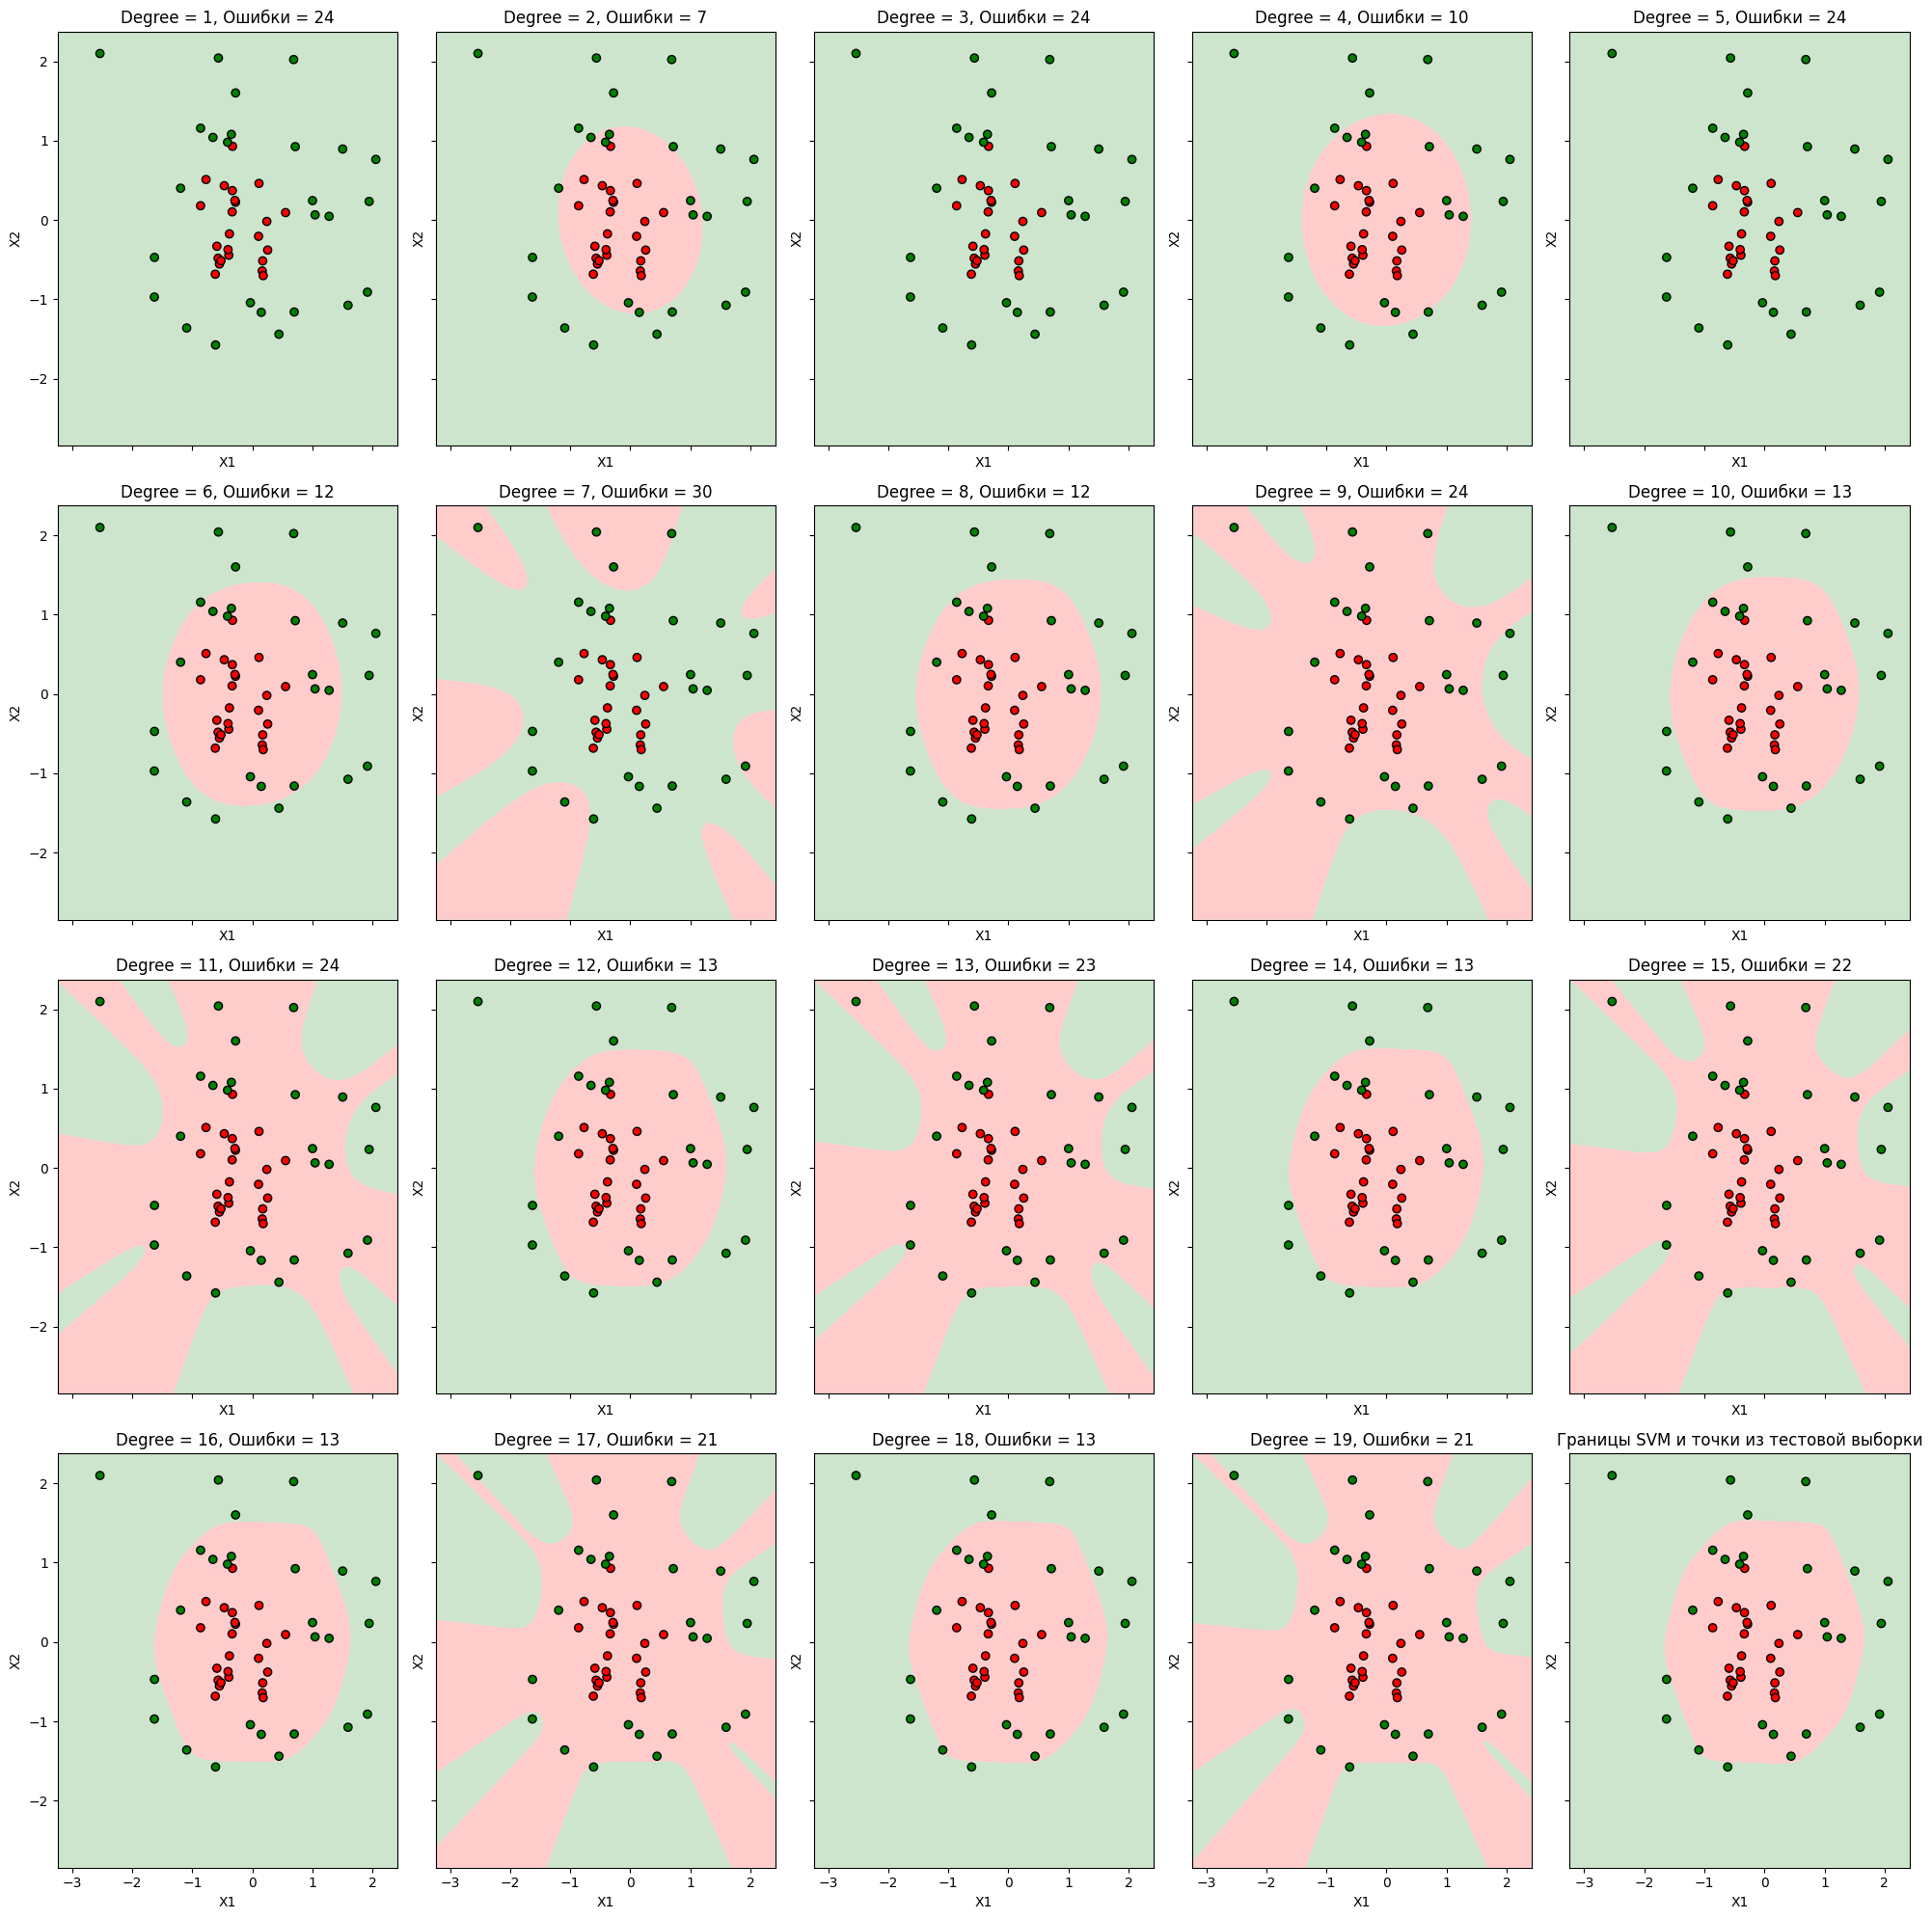

In [ ]:
num_rows = 4
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20), sharex=True, sharey=True)

for i, degree in enumerate(range(1, 21)):
    row = i // num_cols
    col = i % num_cols

    model = svm.SVC(C=1, kernel='poly', degree=degree)
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    errors_on_test_set = len(y_test) - accuracy_score(y_test, y_test_pred, normalize=False)

    xx_train, yy_train, Z_train = grid(X_train)

    axes[row, col].contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    axes[row, col].scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    axes[row, col].set_xlabel('X1')
    axes[row, col].set_ylabel('X2')
    axes[row, col].set_title(f"Degree = {degree}, Ошибки = {errors_on_test_set}")

plt.tight_layout()
plt.show()

# Задание 4

Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества ошибок на тестовой выборке.

In [60]:
train_data = pd.read_csv("svmdata4.txt", delimiter="\t")
test_data = pd.read_csv("svmdata4test.txt", delimiter="\t")

X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]

y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

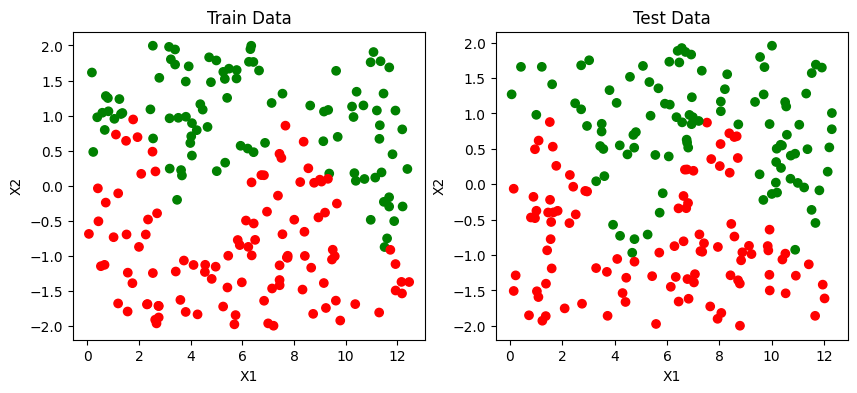

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 0, 'red', 'green')
axs[0].scatter(X_train["X1"], X_train["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 0, 'red', 'green')
axs[1].scatter(X_test["X1"], X_test["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

kernel - poly
Количество ошибок на тестовой выборке: 27
Количество опорных векторов: 73



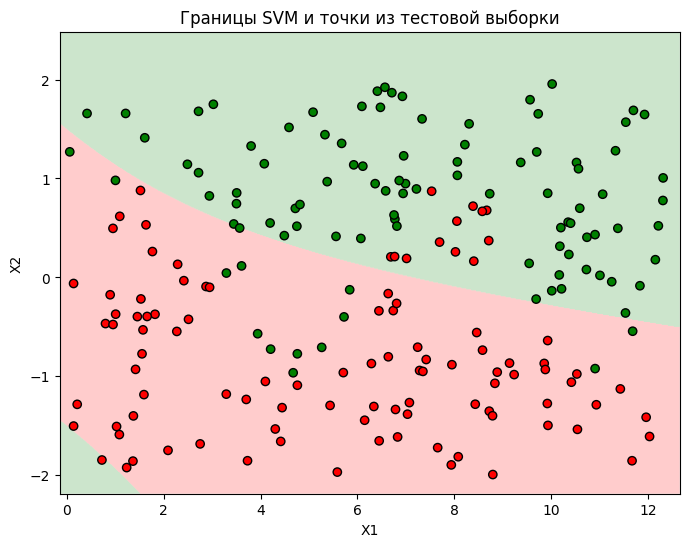

kernel - rbf
Количество ошибок на тестовой выборке: 13
Количество опорных векторов: 27



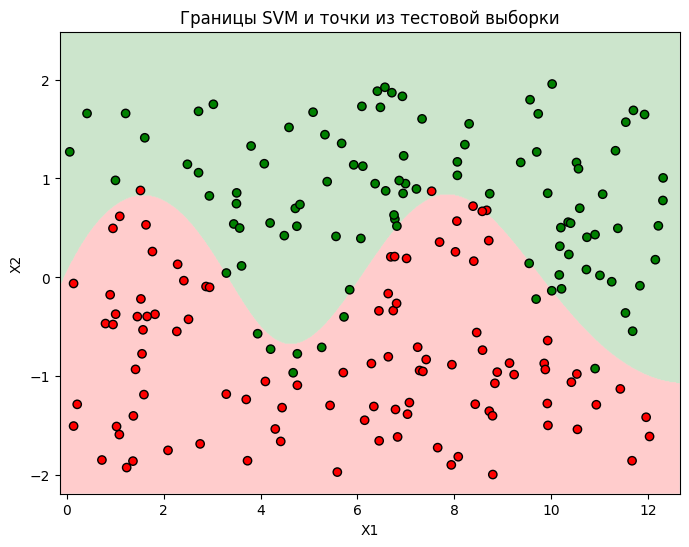

kernel - sigmoid
Количество ошибок на тестовой выборке: 76
Количество опорных векторов: 90



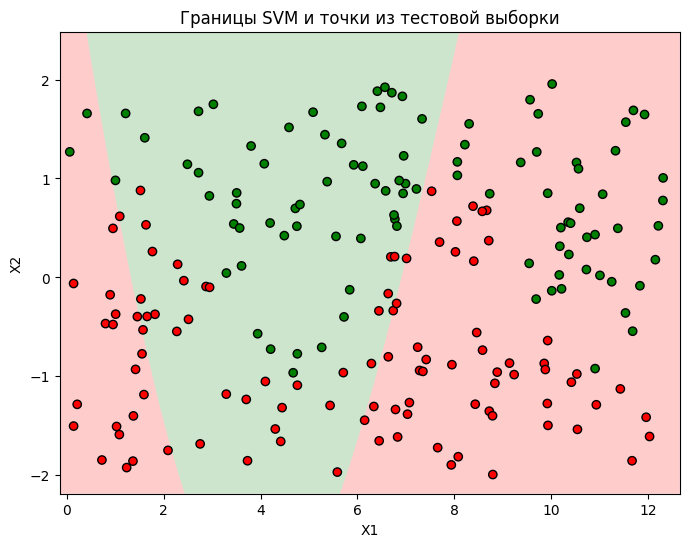

In [65]:
kernels = ['poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print("kernel -", kernel)
    
    model = svm.SVC(C=500, kernel=kernel, degree=2)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    errors_on_test_set = len(y_test) - accuracy_score(y_test, y_test_pred, normalize=False)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    print("Количество ошибок на тестовой выборке:", errors_on_test_set)
    
    num_support_vectors = len(model.support_)
    print("Количество опорных векторов:", num_support_vectors)
    
    print()
    
    custom_cmap = ListedColormap(['r', 'g'])
    colors = np.where(y_test == 0, 'red', 'green')

    xx_train, yy_train, Z_train = grid(X_train)    

    plt.figure(figsize=(8, 6))
    plt.contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Границы SVM и точки из тестовой выборки')
    plt.show()

Следуя из количества ошибок на тестовой выборке, оптимальное ядро - 'radial'.

# Задание 5

Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества ошибок на тестовой выборке. Изменяя значение параметра gamma, продемонстрируйте эффект переобучения, выполните при этом визуализацию разбиения пространства признаков на области.

In [66]:
train_data = pd.read_csv("svmdata5.txt", delimiter="\t")
test_data = pd.read_csv("svmdata5test.txt", delimiter="\t")

X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]

y_train = y_train.apply(lambda x: 0 if x == 'red' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'red' else 1)

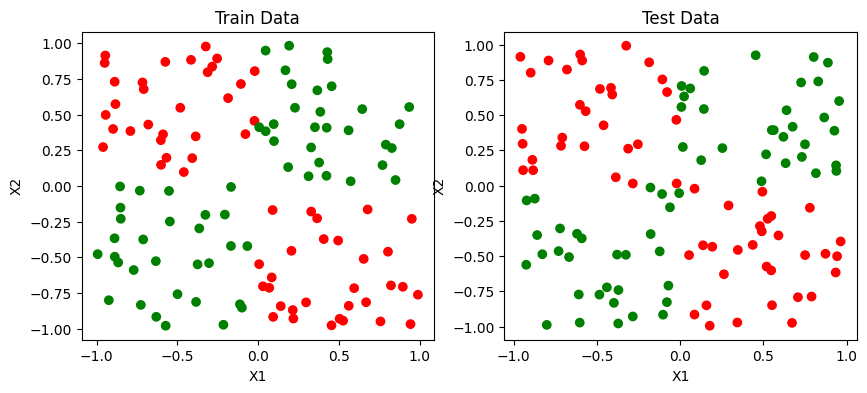

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

colors_train = np.where(y_train == 0, 'red', 'green')
axs[0].scatter(X_train["X1"], X_train["X2"], c=colors_train)
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_title("Train Data")

colors_test = np.where(y_test == 0, 'red', 'green')
axs[1].scatter(X_test["X1"], X_test["X2"], c=colors_test)
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
axs[1].set_title("Test Data")

plt.show()

kernel - poly
Количество ошибок на тестовой выборке: 6
Количество опорных векторов: 17



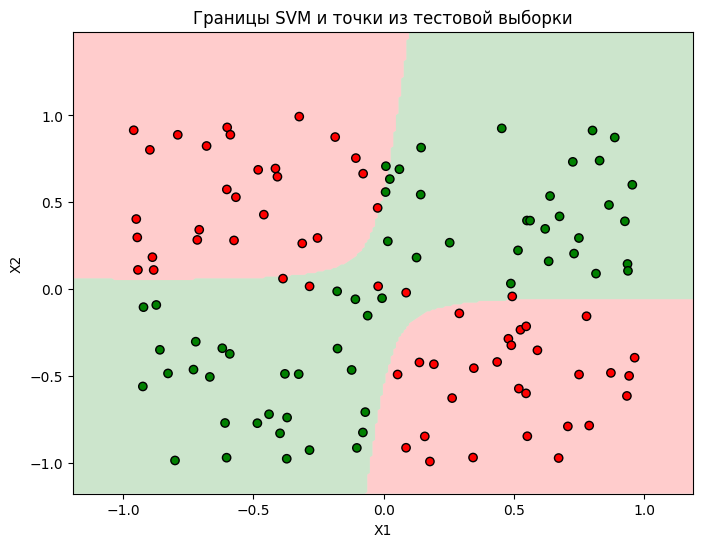

kernel - rbf
Количество ошибок на тестовой выборке: 4
Количество опорных векторов: 22



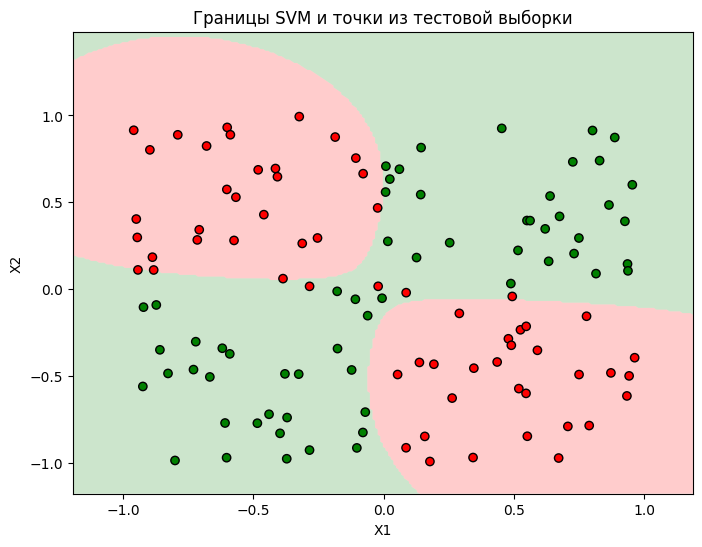

kernel - sigmoid
Количество ошибок на тестовой выборке: 64
Количество опорных векторов: 63



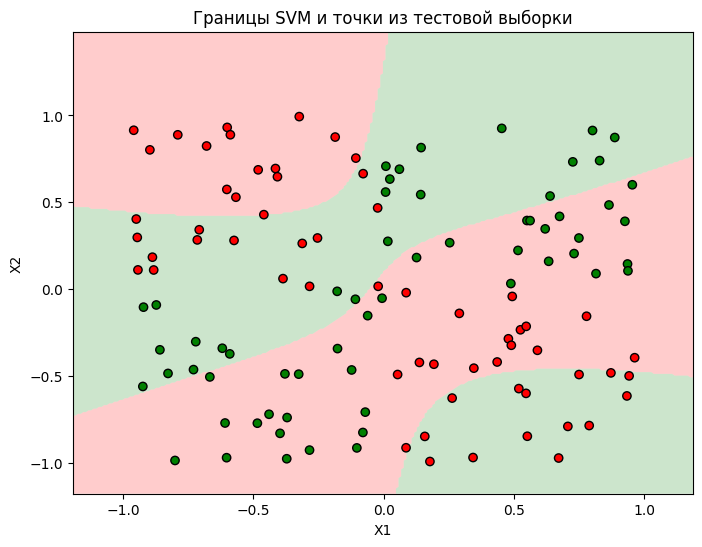

In [72]:
kernels = ['poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print("kernel -", kernel)
    
    model = svm.SVC(C=15, kernel=kernel, degree=2)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    errors_on_test_set = len(y_test) - accuracy_score(y_test, y_test_pred, normalize=False)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    print("Количество ошибок на тестовой выборке:", errors_on_test_set)
    
    num_support_vectors = len(model.support_)
    print("Количество опорных векторов:", num_support_vectors)
    
    print()
    
    custom_cmap = ListedColormap(['r', 'g'])
    colors = np.where(y_test == 0, 'red', 'green')

    xx_train, yy_train, Z_train = grid(X_train)    

    plt.figure(figsize=(8, 6))
    plt.contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Границы SVM и точки из тестовой выборки')
    plt.show()

Следуя из количества ошибок на тестовой выборке, оптимальные ядра - 'polinomial' 2-ой степени и 'radial'. Они показывают сравнительно одинаковое количество ошибок при классификации этих данных.

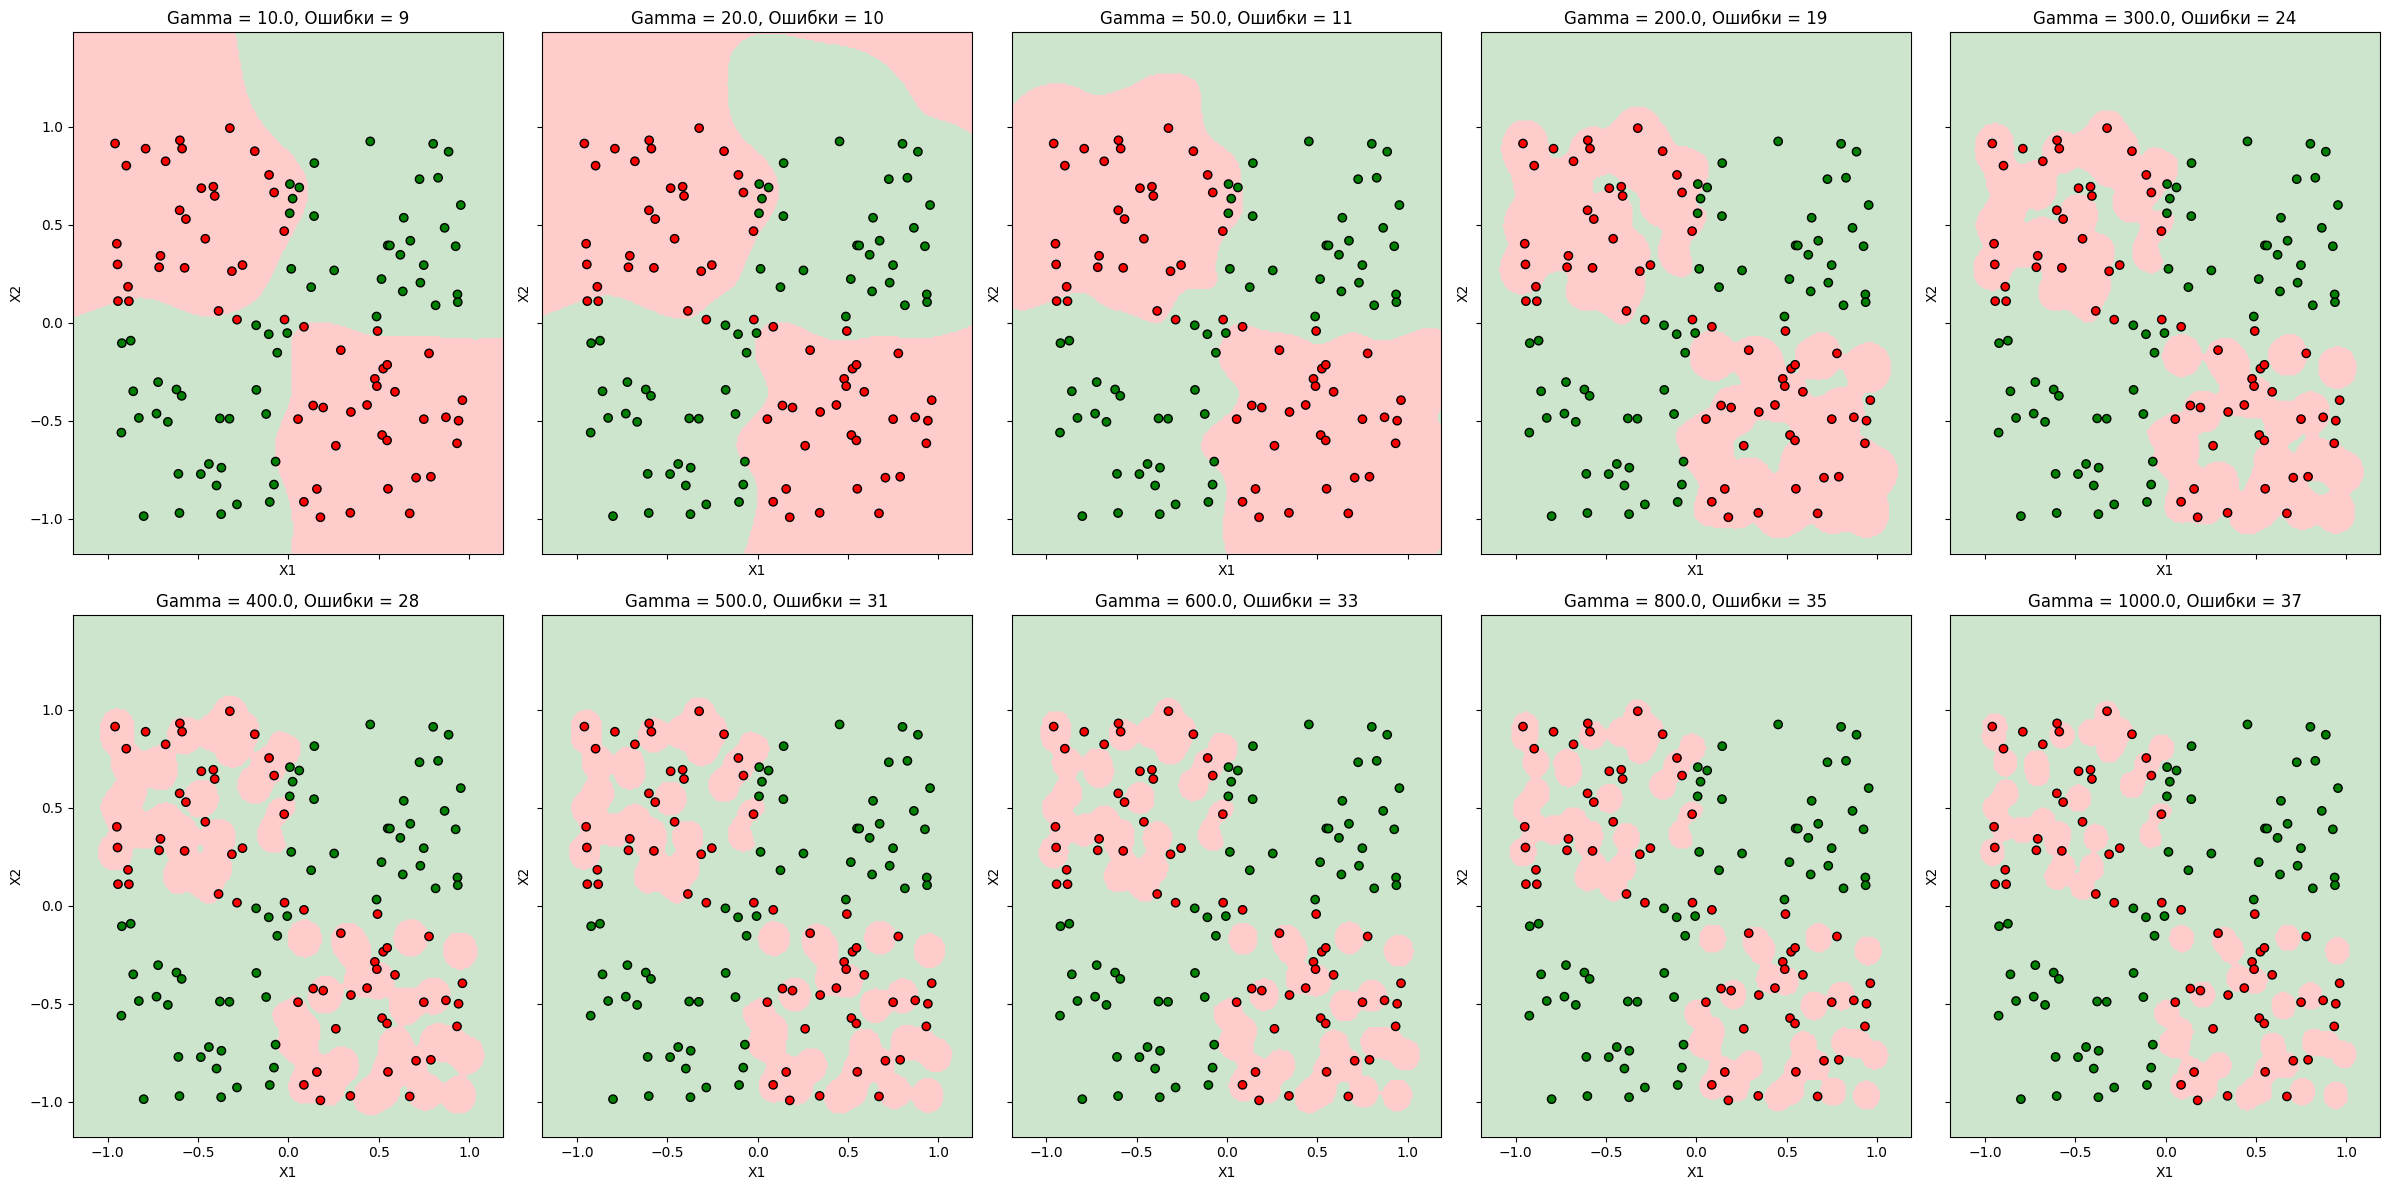

In [134]:
num_rows = 2
num_cols = 5

gammas = [10.0, 20.0, 50.0, 200.0, 300.0, 400.0, 500.0, 600.0, 800.0, 1000.0]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24,12), sharex=True, sharey=True)

for i, gamma in zip(range(0, 11), gammas):
    row = i // num_cols
    col = i % num_cols

    model = svm.SVC(C=15, kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    errors_on_test_set = len(y_test) - accuracy_score(y_test, y_test_pred, normalize=False)

    xx_train, yy_train, Z_train = grid(X_train)

    axes[row, col].contourf(xx_train, yy_train, Z_train, cmap=custom_cmap, alpha=0.2, extend='both', levels=[-1, 0, 1], antialiased=True)
    axes[row, col].scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    axes[row, col].set_xlabel('X1')
    axes[row, col].set_ylabel('X2')
    axes[row, col].set_title(f"Gamma = {round(gamma, 2)}, Ошибки = {errors_on_test_set}")

plt.tight_layout()
plt.show()

Из наглядных результатов видим, что при больших значениях gamma модель начинает переобучаться (слишком подстраиваться под обучающие данные), вследствие чего увеличивается число ошибок классификации на тестовой выборке.

Для демонстрации взята модель с ядром 'radial', C = 15 и значения gamma = [10, 20, 50, 200, 300, 400, 500, 600, 800, 1000].

# Задание 6

Постройте алгоритм метода опорных векторов типа "eps-regression" с параметром C = 1, используя ядро "radial". Отобразите на графике зависимость среднеквадратичной ошибки на обучающей выборке от значения параметра ε. Прокомментируйте полученный результат.

In [161]:
data = pd.read_csv("svmdata6.txt", delimiter="\t")

X_train = data["X"]
y_train = data["Y"]

X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

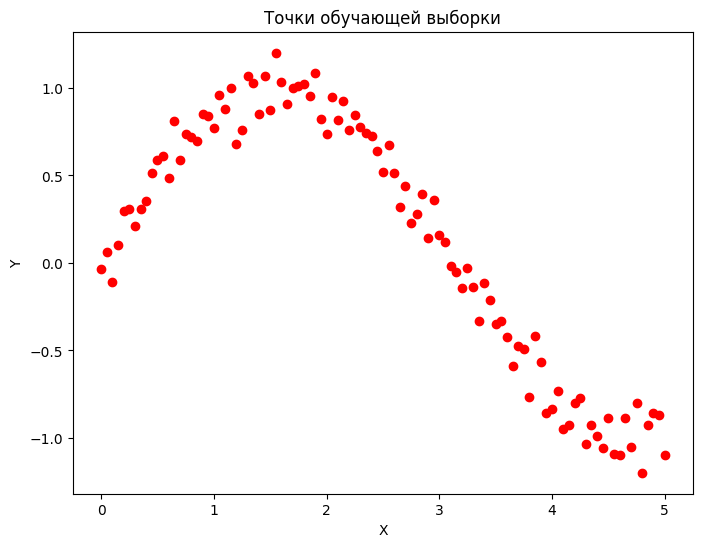

In [185]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Точки обучающей выборки')
plt.show()

In [234]:
model = svm.SVR(C=1, kernel='rbf', epsilon=0.2)
model.fit(X_train, y_train)

SVR(C=1, epsilon=0.2)

In [235]:
y_predict = model.predict(X_train)
params = model.get_params()

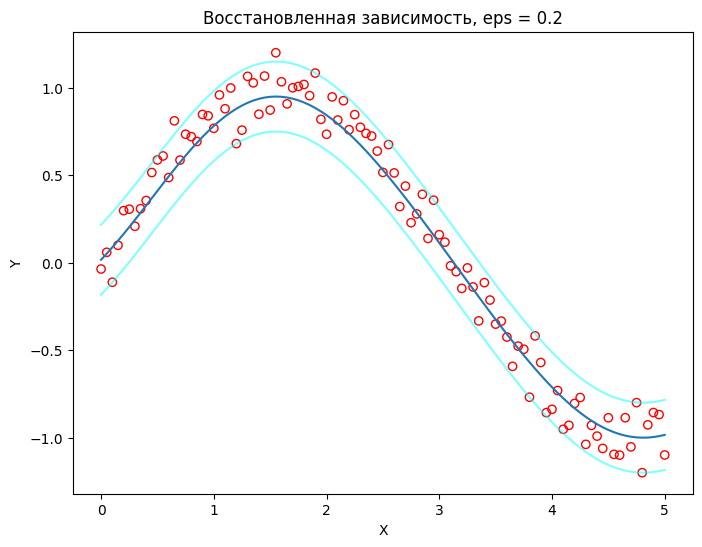

In [236]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, facecolors="None", edgecolors='r')
plt.plot(X_train, y_predict)
plt.plot(X_train, y_predict + params['epsilon'], color='cyan', alpha=0.5)
plt.plot(X_train, y_predict - params['epsilon'], color='cyan', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"Восстановленная зависимость, eps = {params['epsilon']}")
plt.show()

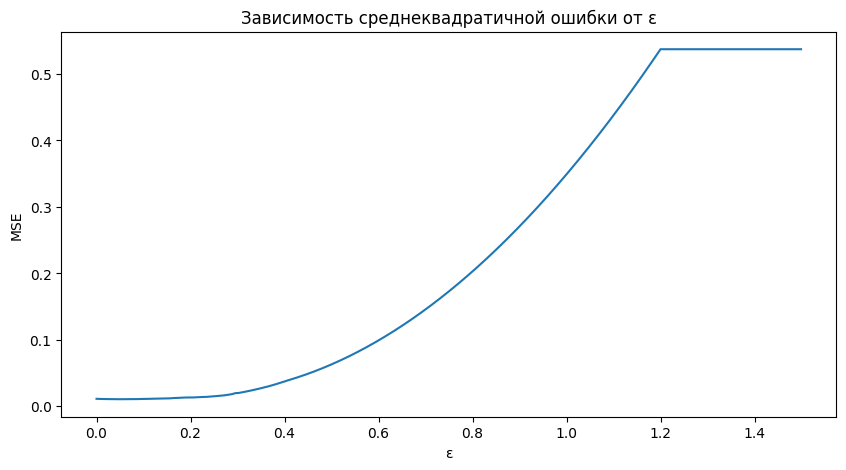

In [230]:
epsilons = []
mean_squared_errors = []

for eps in np.arange(0.0, 1.5, 0.001):
    model = svm.SVR(C=1, kernel='rbf', epsilon=eps)
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_train)
    
    epsilons.append(eps)
    mean_squared_errors.append(mean_squared_error(y_train,y_predict))
    
plt.figure(figsize=(10, 5))
plt.plot(epsilons, mean_squared_errors)
plt.xlabel('ε')
plt.ylabel('MSE')
plt.title("Зависимость среднеквадратичной ошибки от ε")
plt.show()

Из графика зависимости среднеквадратичной ошибки от ε видим, что ошибка растет с увеличением параметра. При увеличении ε модель становится менее чувствительной к выбросам, но при слишком большом значении может потерять способность обобщать данные и начать предсказывать данные слишком просто, что приведет к недообучению.